In [1]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
%matplotlib inline

# Загружаем датасет

In [2]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

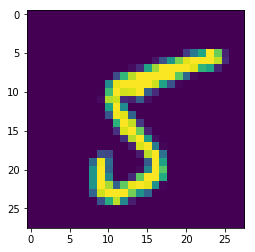

In [3]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][0].reshape(28,28))

# Обучаем модель

In [4]:
X,y=train['data'],train['labels']

In [5]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / (std+0.0001)

In [6]:
X = np.hstack([ np.ones((X.shape[0], 1)), X] )

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=10)

In [8]:
# Инициализируем веса случайны образом
np.random.seed(11)
w = np.random.normal(scale=0.001, size = x_train.shape[1])

In [9]:
y_train[y_train==5]=-1
y_train[y_train==6]=1
y_test[y_test==5]=-1
y_test[y_test==6]=1

In [10]:
def sigmoid(w,X):
    return list(map(lambda x: 1/(1+math.exp(-np.dot(w,x))), X))
def Loss(Y,X,w):
    return sum(list(map(lambda x: math.log(1 + math.exp(-1*x[1]*np.dot(w,x[0]))),zip(X,Y))))


In [11]:
def accuracy(y_hat,y):
    return sum(1 for t,p in zip(y,y_hat) if (p-.5)*t > 0) / len(y)

In [20]:
tr_eval=[]
te_eval=[]
for k in range(200):
    for i in range(x_train.shape[0]):
      
        #j = np.random.randint(0, x_train.shape[0])
        grad = np.sum([
            -1* y_train[j] * x_train[j] /( 1 + math.exp( y_train[j] * np.dot(w.T, x_train[j]) ) ) + 0.0103 * w
            for j in map(lambda t: np.random.randint(0, x_train.shape[0]), range(7))
        ], axis=0)
        w = w - 1/(100+k*x_train.shape[0]//100+i//100)* grad
    y_hat_train=sigmoid(w,x_train)
    y_hat_test=sigmoid(w,x_test)
    train_acc = accuracy(y_hat_train, y_train)
    test_acc = accuracy(y_hat_test, y_test)
    loss_train=(Loss(y_train,x_train,w)/len(x_train))
    loss_test=(Loss(y_test,x_test,w)/len(x_test))
    tr_eval.append([loss_train,train_acc])
    te_eval.append([loss_test,test_acc])

# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

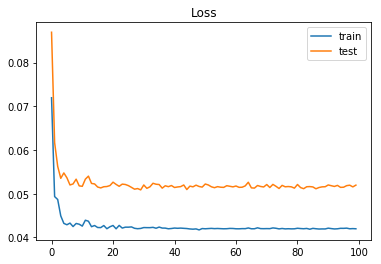

In [14]:
plt.title('Loss')
plt.plot([e[0] for e in tr_eval], label='train')
plt.plot([e[0] for e in te_eval], label='test')
plt.legend()

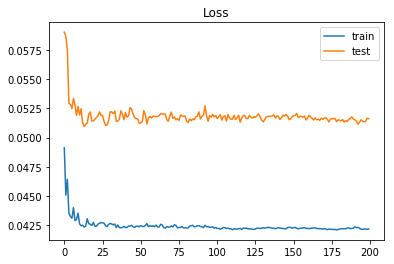

In [21]:
plt.title('Loss')
plt.plot([e[0] for e in tr_eval], label='train')
plt.plot([e[0] for e in te_eval], label='test')
plt.legend()

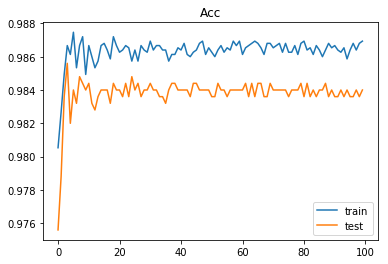

In [16]:
plt.title('Acc')
plt.plot([e[1] for e in tr_eval[:]], label='train')
plt.plot([e[1] for e in te_eval[:]], label='test')
plt.legend()

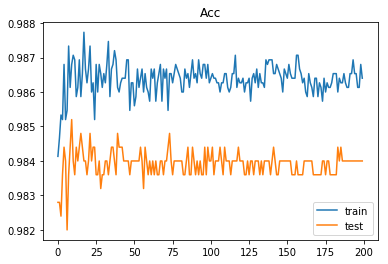

In [22]:
plt.title('Acc')
plt.plot([e[1] for e in tr_eval[:]], label='train')
plt.plot([e[1] for e in te_eval[:]], label='test')
plt.legend()

# Сохраняем данные

In [23]:
X = test_no_lables['data']
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / (std+0.0001)
X = np.hstack([ np.ones((X.shape[0], 1)), X] )# compute Y_pred
Y_pred=sigmoid(w,X)
with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(len(Y_pred)):
        print(i, Y_pred[i], sep=',', file=fout)